In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Problem 1

## Part 1: Fashion MNIST Clothing Classification

The Fashion-MNIST dataset consists of images of articles from Zalando, with each example being a 28x28 grayscale image. Each image is associated with a label from one of 10 classes. This dataset was proposed as a more challenging replacement for the MNIST dataset.

In [3]:
url = 'https://raw.githubusercontent.com/um-perez-alvaro/Data-Science-Theory/master/Data/fashion-mnist_train.csv'
data = pd.read_csv(url)
data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,8,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
1,1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
2,0,0.0,0.0,0.003922,0.0,0.0,0.0,0.0,0.0,0.0,...,0.462745,0.400000,0.40000,0.188235,0.0,0.0,0.003922,0.0,0.0,0.0
3,8,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.003045,0.002876,0.00303,0.002968,0.0,0.0,0.000000,0.0,0.0,0.0
4,0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0


In [4]:
data.shape

(5000, 785)

In [5]:
y = data.label.to_numpy() # labels 
X = data.iloc[:,1:785].to_numpy() # pixels

Each image in the Fashion-MNIST dataset consists of 28 pixels in height and 28 pixels in width, for a total of 784 pixels. Each pixel has a single pixel-value associated with it, which indicates the lightness or darkness of that pixel. Higher values correspond to darker pixels. The pixel-value is an integer between 0 and 255, where 0 represents black and 255 represents white.

The following figure displays a few examples of images from the Fashion-MNIST dataset:

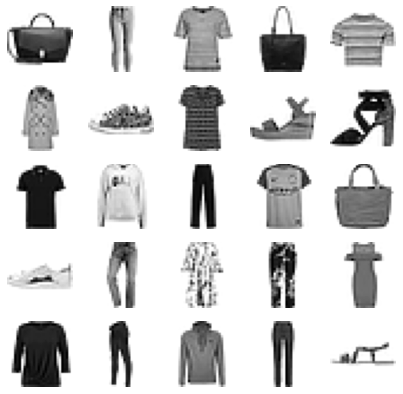

In [7]:
plt.figure(figsize=(7,7))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(X[i].reshape(28,28),cmap='binary')
    plt.axis('off')    

**Labels:**

| Label | Description |
| :- | -: |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

The objective of this problem is to use the k-nearest neighbors (kNN) classifier to predict the labels of clothing images in the Fashion-MNIST dataset.

To begin, split the Fashion-MNIST dataset into a training set and a validation set.

Then, use the training and validation sets to fine-tune the hyperparameters of the kNN classifie (`k` and `weights`).

Finally, evaluate the performance of your kNN classifier on the provided test set. 
Compute the confusion matrix and the percentage of correct classifications.

In [8]:
url = 'https://raw.githubusercontent.com/um-perez-alvaro/Data-Science-Theory/master/Data/fashion-mnist_test.csv'
test_data = pd.read_csv(url)
test_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0.0,0.0,0.0,0.000015,0.0,0.0,0.000492,0.001569,0.000323,...,0.003306,0.003291,0.003353,0.003383,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,6,0.0,0.0,0.0,0.000015,0.0,0.0,0.000000,0.000000,0.000000,...,0.001353,0.001261,0.000877,0.000677,0.000723,0.000000,0.000000,0.000031,0.000031,0.0
2,8,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3,4,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.517647,0.823529,0.698039,0.588235,0.000000,0.000000,0.0
4,9,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


## Part 2: The Labeled Faces in the Wild Dataset 

In [10]:
# Run this cell to load the Labeled Faces in the Wild people dataset
from sklearn.datasets import fetch_lfw_people
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

X = lfw_people.data/255
y = lfw_people.target

target_names = lfw_people.target_names
n_classes = target_names.shape[0]

The Labeled Faces in the Wild dataset contains 1288 images, each of size 50x37 pixels, resulting in 1850 features per image. Each feature represents the intensity of one pixel in the image.

(-0.5, 36.5, 49.5, -0.5)

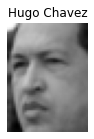

In [11]:
# display one image
plt.figure(figsize=(2,2))
some_face = X[0]
some_face_image = some_face.reshape(50,37)
plt.imshow(some_face_image,cmap='gray')
plt.title(target_names[y[0]])
plt.axis('off')

The following figure displays a few additional examples of images from the Labeled Faces in the Wild dataset:

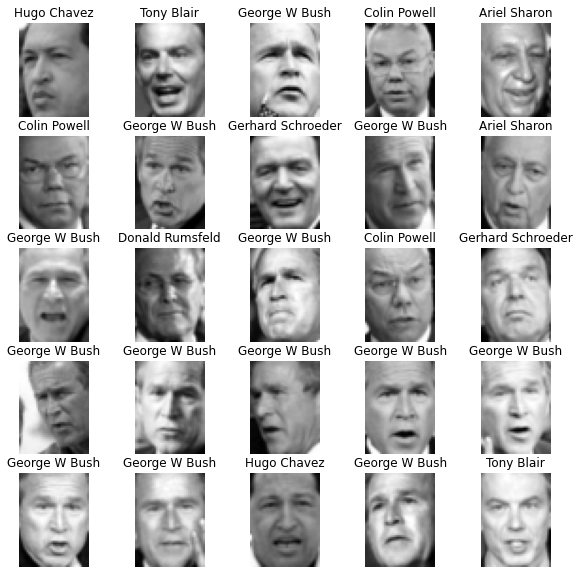

In [12]:
plt.figure(figsize=(10,10))
for i in range(25):
    face = X[i]
    face_image = face.reshape(50,37)
    plt.subplot(5,5,i+1)
    plt.imshow(face_image,cmap = 'gray')
    plt.title(target_names[y[i]])
    plt.axis('off')  

**Labels:**

| Label | Description |
| :- | -: |
| 0 | Ariel Sharon |    
| 1 | Colin Powell |       
| 2 | Donald Rumsfeld |      
| 3 | George W Bush |       
| 4 | Gerhard Schroeder |      
| 5 | Hugo Chavez |      
| 6 | Tony Blair |  

The objective of this problem is to use the softmax classifier to predict the labels of the images in the Labeled Faces in the Wild dataset.

To begin, split the Labeled Faces in the Wild dataset into a training set and a test set.

Next, use the training data to fit a softmax regression model.

Finally, evaluate the performance of your softmax classifier on the provided test set. Compute the confusion matrix and the percentage of correct classifications.